# STP598 Machine Learning \& Deep Learning
## Written Assignment 2
### Due 11:59pm Sunday Oct. 1, 2023 on Canvas

### name,  id

## Question 1

Show that in the Bayesian linear regression, by properly choosing prior for $\beta$, the posterior mean of $\beta$ can be recognized as ridge regression solution. You can use conclusions (formulae) from lecture 2.

## Question 2 (Negative Bionomial Regression)

In class we talked about Poisson regression for counting data. Notice that the variance is equal to the mean $\mathrm{Var}(Y) = \mathrm{E}(Y)$. However in certain circumstances the observed variance is bigger than the mean, known as *overdispersion* and Poisson becomes an inappropriate model. To address this issue, alternative models such as **negative binomial** model and **zero-inflated** model are proposed.

In negative binomial regression, the counts $Y$ are modeled using the negative binomial distribution, which usually characterizes the distribution of random number of successes before $r$ failures with success probability $p$:
$$Y\sim \mathrm{NB}(r, p), \qquad \mathrm{Pr}(Y=y|r, p) = \binom{y+r-1}{y} p^y (1-p)^r$$
with the mean $\mathrm{E}(Y)=\mu=\frac{pr}{1-p}$ and the variance $\mathrm{Var}(Y)=\mu(1+\mu/r)$.
Reparametrize it in terms of $r$ and $\mu$ and we actually get negative binomial represented as **Gamma-Poisson** mixture:
$$
Y|\lambda \sim \mathrm{Pois}(\lambda)\\
\lambda|r,\mu \sim \Gamma(r, \mu/r)
$$
with the density rewritten as
$$\mathrm{Pr}(Y=y|r, \mu) = \frac{\Gamma(y+r)}{\Gamma(y+1)\Gamma(r)} \left(\frac{\mu}{r+\mu}\right)^y \left(\frac{r}{r+\mu}\right)^r$$

Now in generalized linear model of negative binomial regression given covariates $X$, what is the link function? Can you write down the log-likelihood function in terms of $r$ and regression parameter $\beta$? Briefly explain how you will fit the model if $r$ is relaxed to be a real number?

## Question 3

The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour and Virginica) with 4 attributes: sepal length, sepal width, petal length and petal width.

Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. We can plot the different samples on the first 2 principal components.

We first load the data set.

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

Now we run PCA on this data set and plot the samples on the first 2 principal directions.

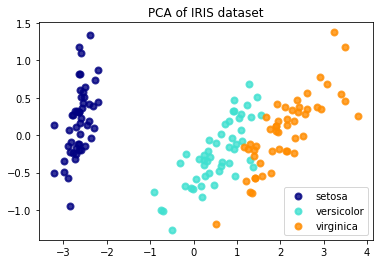

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()

Now make the similar plots using LDA (`sklearn.discriminant_analysis.LinearDiscriminantAnalysis`).

### extra credit

Fit the data with QDA (`sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`). Plot the classfication boundaries and compare it with LDA boundaries side by side.